# Notebook overview
Compares evaluation scores across all four models (k-NN and MLP trained on origin and resized images) using bar charts at macro and per-class levels.

- Loads score reports (precision, recall, F1, balanced accuracy) for k-NN origin/resized and MLP origin/resized
- Plots macro-average scores (precision, recall, F1, balanced accuracy) as grouped bar charts for high and low resolution test data
- Plots per-class scores (precision, recall, F1) as horizontal bar charts for all 91 classes
- Saves visualizations (PDF) to results folder

# Preperation

### import

In [37]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

### Paths

In [38]:
# knn origin score folder
KNN_ORIGIN_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/models/knn/origin/scores'
knn_origin_score_dir_path = Path(KNN_ORIGIN_SCORE_DIR_PATH)
if not knn_origin_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {KNN_ORIGIN_SCORE_DIR_PATH}")

# knn resized score folder
KNN_RESIZED_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/models/knn/resized/scores'
knn_resized_score_dir_path = Path(KNN_RESIZED_SCORE_DIR_PATH)
if not knn_resized_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {KNN_RESIZED_SCORE_DIR_PATH}")

# knn origin score folder
MLP_ORIGIN_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/models/mlp/origin/scores'
mlp_origin_score_dir_path = Path(MLP_ORIGIN_SCORE_DIR_PATH)
if not mlp_origin_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {MLP_ORIGIN_SCORE_DIR_PATH}")

# knn resized score folder
MLP_RESIZED_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/models/mlp/resized/scores'
mlp_resized_score_dir_path = Path(MLP_RESIZED_SCORE_DIR_PATH)
if not mlp_resized_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {MLP_RESIZED_SCORE_DIR_PATH}")

# folder to save results
RESULT_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/models/multi_model_visualisation'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

### load df - scores

In [39]:
# knn
knn_origin_high_scores = pd.read_csv( knn_origin_score_dir_path / 'high_id_test_score_report.csv', index_col=0)
knn_origin_low_scores = pd.read_csv( knn_origin_score_dir_path / 'low_id_test_score_report.csv', index_col=0)


knn_resized_high_scores = pd.read_csv( knn_resized_score_dir_path / 'high_id_test_score_report.csv', index_col=0)
knn_resized_low_scores = pd.read_csv( knn_resized_score_dir_path / 'low_id_test_score_report.csv', index_col=0)


# mlp
mlp_origin_high_scores = pd.read_csv( mlp_origin_score_dir_path / 'high_id_test_score_report.csv', index_col=0)
mlp_origin_low_scores = pd.read_csv( mlp_origin_score_dir_path / 'low_id_test_score_report.csv', index_col=0)


mlp_resized_high_scores = pd.read_csv( mlp_resized_score_dir_path / 'high_id_test_score_report.csv', index_col=0)
mlp_resized_low_scores = pd.read_csv( mlp_resized_score_dir_path / 'low_id_test_score_report.csv', index_col=0)

### Function - plot_barchart_of_avg_scores

In [40]:
def plot_barchart_of_avg_scores(knn_origin_high_scores, knn_resized_high_scores, mlp_origin_high_scores, mlp_resized_high_scores, titel: str):
    bar_width = 0.1
    x_position_center = np.arange(0,len(knn_origin_high_scores),1) 
    position_left = - bar_width
    position_left_left = - bar_width - bar_width
    position_right = 0
    position_right_right = + bar_width

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x_position_center + position_left_left, knn_origin_high_scores, width=bar_width, align='edge', color='blue', label='knn origin')
    ax.bar(x_position_center + position_left, knn_resized_high_scores, width=bar_width, align='edge', color='darkblue', label='knn resized')
    ax.bar(x_position_center + position_right, mlp_origin_high_scores, width=bar_width, align='edge', color='orange', label='mlp origin')
    ax.bar(x_position_center + position_right_right, mlp_resized_high_scores, width=bar_width, align='edge', color='darkorange', label='mlp resized')

    ax.set_xticks(x_position_center)
    ax.set_xticklabels(['Macro Precision', 'Macro Recall', 'Macro F1-Score', 'Balanced Accuracy'], fontsize=13)

    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.01, 0.05))
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel('Score (0–1)', fontsize=13)

    ax.grid(True, axis='y')
    ax.set_axisbelow(True)

    #ax.set_title(titel)
    ax.legend(loc='lower right', fontsize=14)

    return fig

### Test
# testplot = plot_barchart_of_avg_scores(
#     knn_origin_high_scores.iloc[:3,92],
#     knn_resized_high_scores.iloc[:3,92],
#     mlp_origin_high_scores.iloc[:3,92],
#     mlp_resized_high_scores.iloc[:3,92],
#     'macro average scores of high resolution testdata'
# )

### Apply - avg_scores_high_barchart

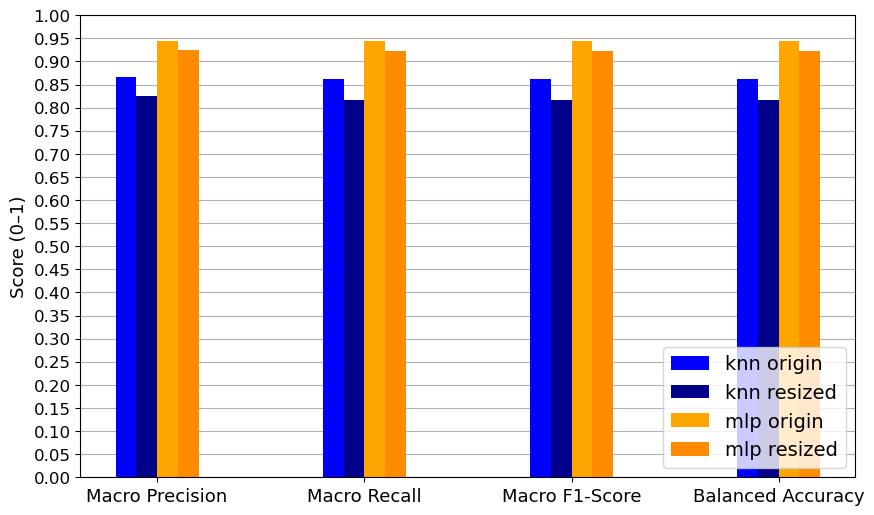

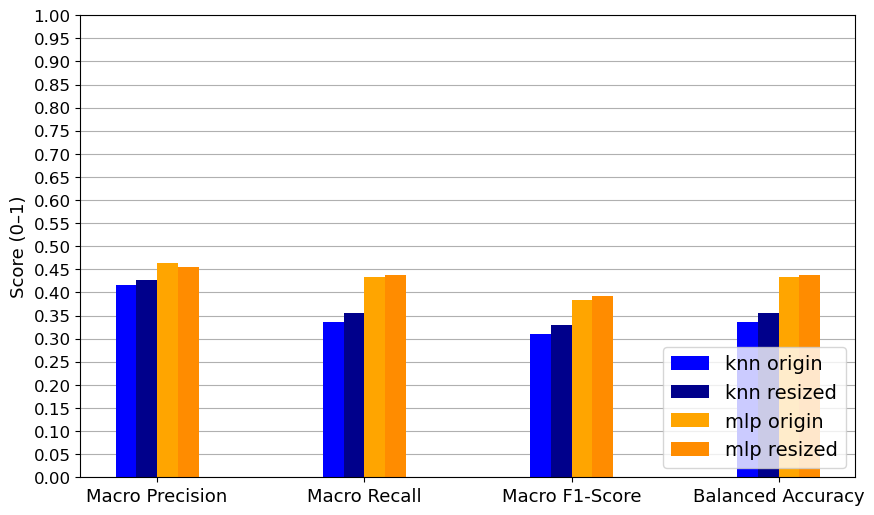

In [41]:
# high
avg_scores_high_barchart = plot_barchart_of_avg_scores(
    knn_origin_high_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    knn_resized_high_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    mlp_origin_high_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    mlp_resized_high_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    'Macro scores of high-resolution GBIF testdata'
)

avg_scores_high_barchart.savefig( result_dir_path / 'high_testdata_avg_scores_barchart.pdf' )

# low
avg_scores_low_barchart = plot_barchart_of_avg_scores(
    knn_origin_low_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    knn_resized_low_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    mlp_origin_low_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    mlp_resized_low_scores.loc[['precision', 'recall', 'f1-score', 'balanced_accuracy'],['macro avg']].squeeze(),
    'Macro scores of low-resolution TRAP testdata'
)

avg_scores_low_barchart.savefig( result_dir_path / 'low_testdata_avg_scores_barchart.pdf' )

### Function - plot_bar_chart_of_class_scores

In [42]:
def plot_bar_chart_of_class_scores(knn_origin_high_scores, knn_resized_high_scores, mlp_origin_high_scores, mlp_resized_high_scores, titel: str):
    nr_of_classes = len(knn_origin_high_scores)
    
    bar_width = 0.1
    group_width = bar_width*4 + 0.2  # 0.2 for space between bar_groups - offset
    y_position_center = np.arange(0,nr_of_classes,1) * group_width
    position_left = - bar_width
    position_left_left = - bar_width - bar_width
    position_right = 0
    position_right_right = + bar_width

    fig, ax = plt.subplots(figsize=(15, 80))

    ax.barh(y_position_center + position_left_left, knn_origin_high_scores, height=bar_width, align='edge', color='blue', label='knn origin')
    ax.barh(y_position_center + position_left, knn_resized_high_scores, height=bar_width, align='edge', color='darkblue', label='knn resized')
    ax.barh(y_position_center + position_right, mlp_origin_high_scores, height=bar_width, align='edge', color='orange', label='mlp origin')
    ax.barh(y_position_center + position_right_right, mlp_resized_high_scores, height=bar_width, align='edge', color='darkorange', label='mlp resized')

    ax.set_yticks(y_position_center)
    ax.set_yticklabels([f'Class {i}' for i in np.arange(1,nr_of_classes + 1,1)], fontsize=10)
    ax.set_ylim(- bar_width * 3, y_position_center[-1] + bar_width*3)

    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0, 1.01, 0.05))
    ax.set_xlabel('Score (0–1)')

    ax.grid(True, axis='x')
    ax.set_axisbelow(True)

    ax.set_title(titel)
    ax.legend(loc='lower right')
    return fig  

### Apply - high_testdata_class_scores_barchart

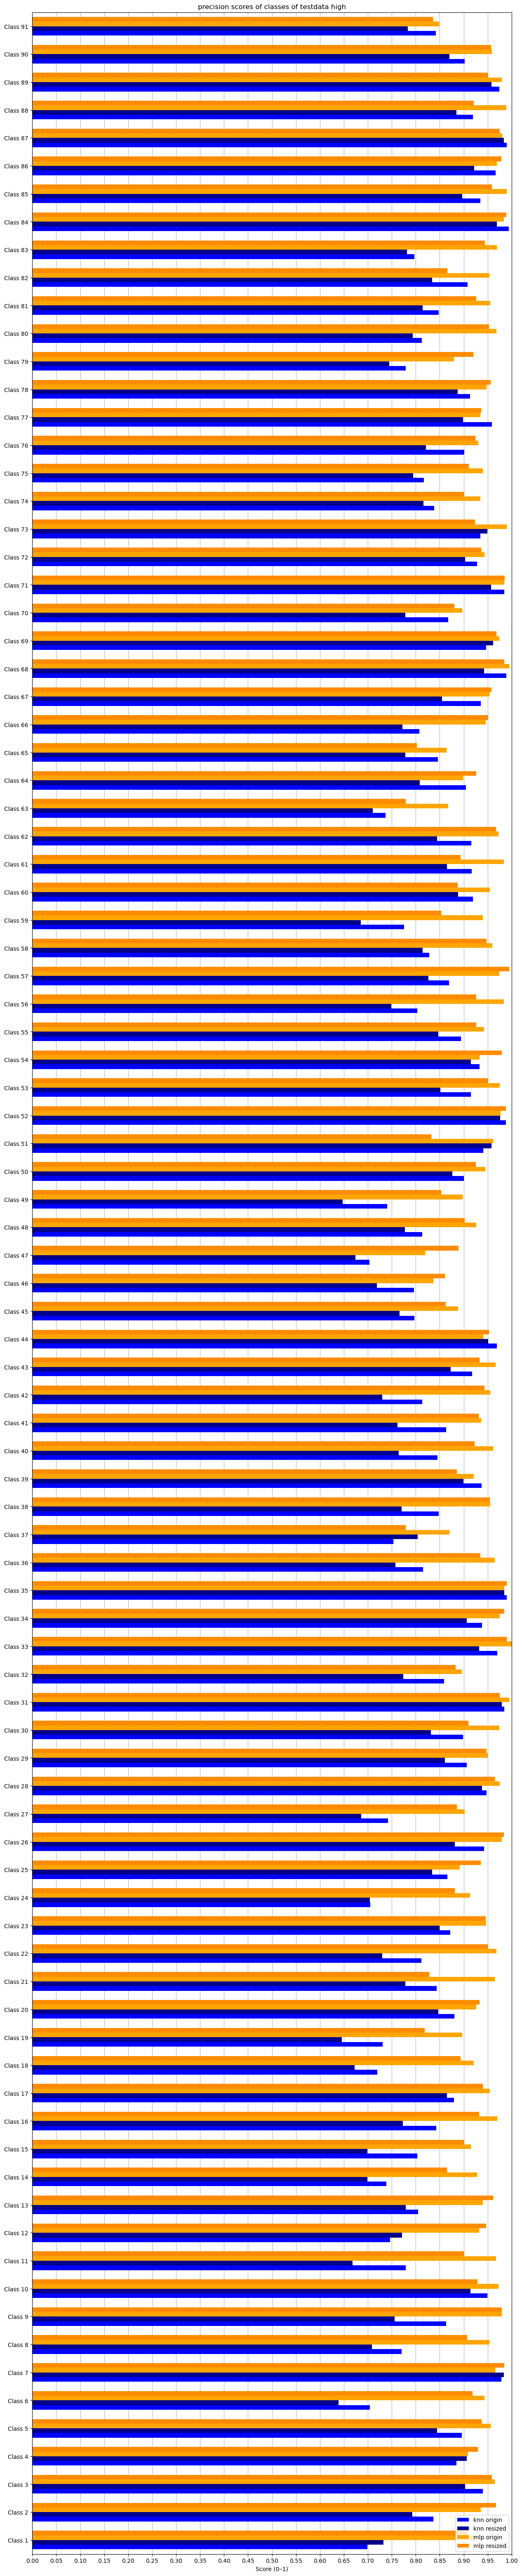

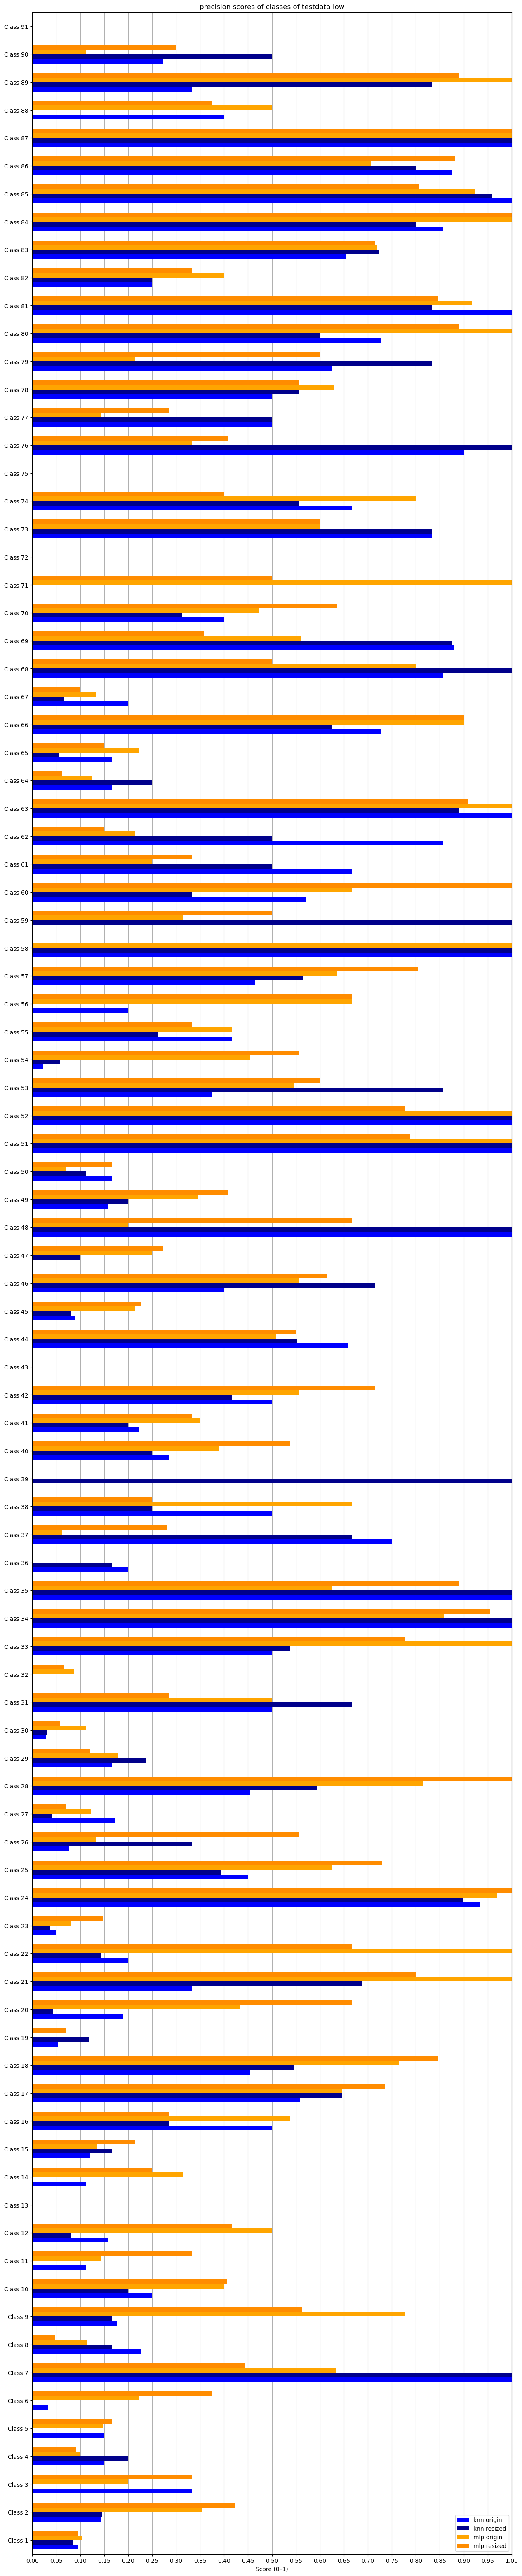

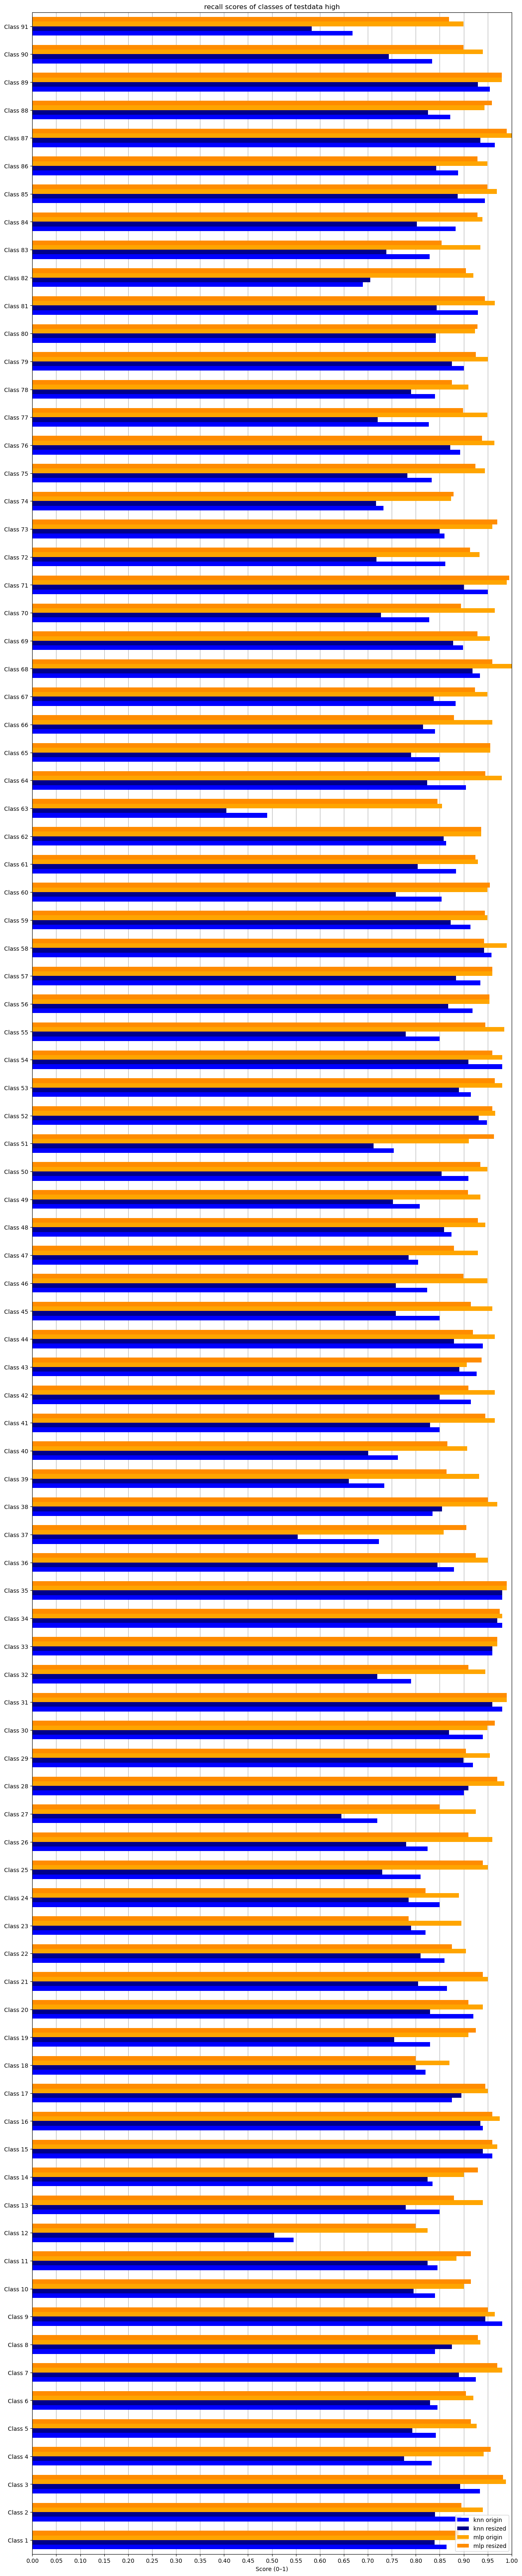

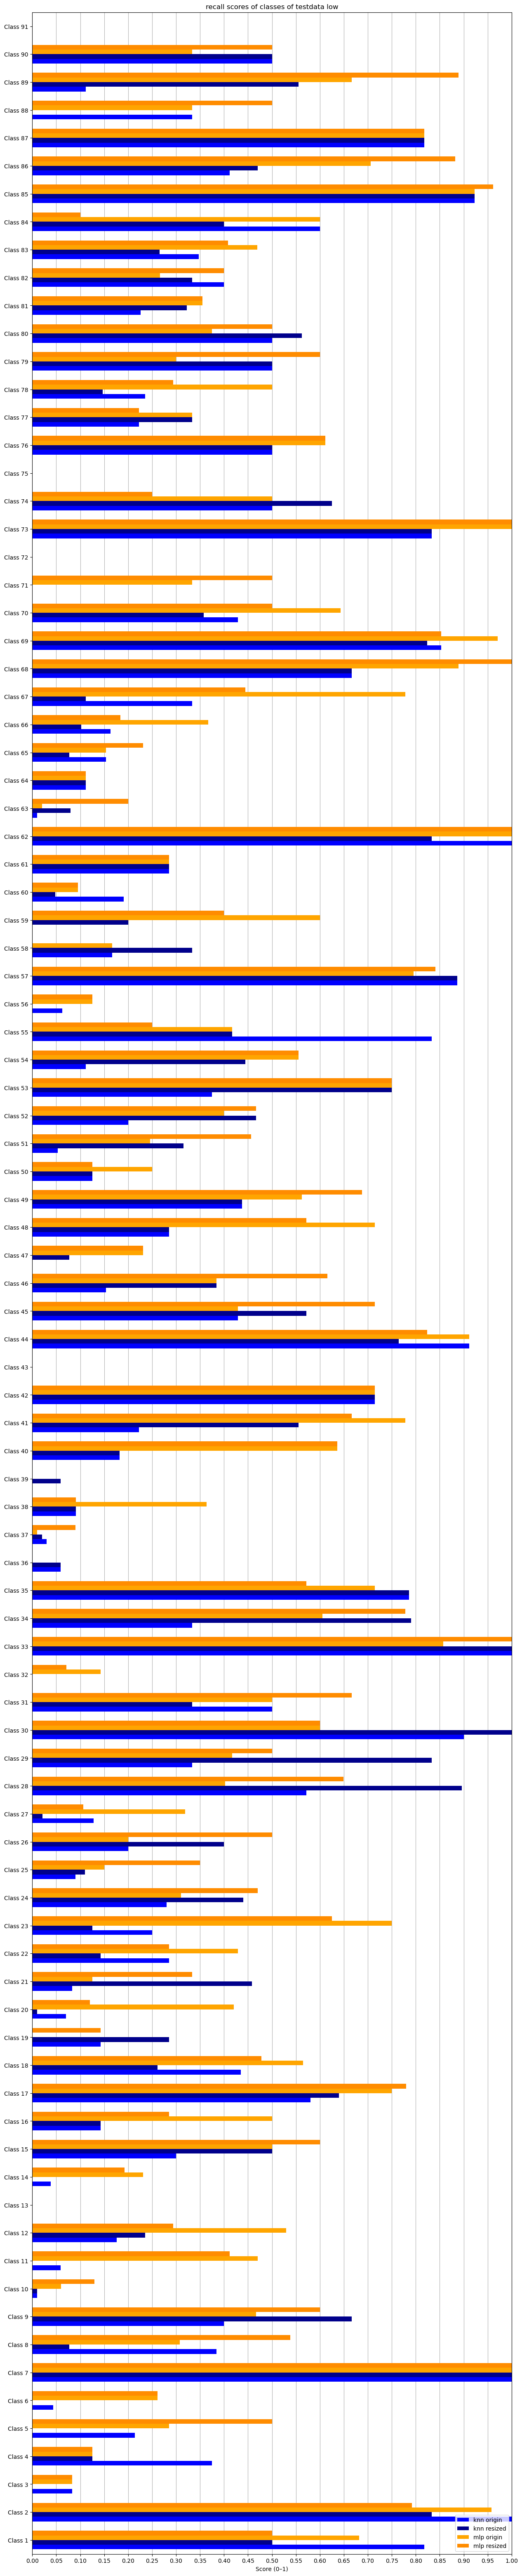

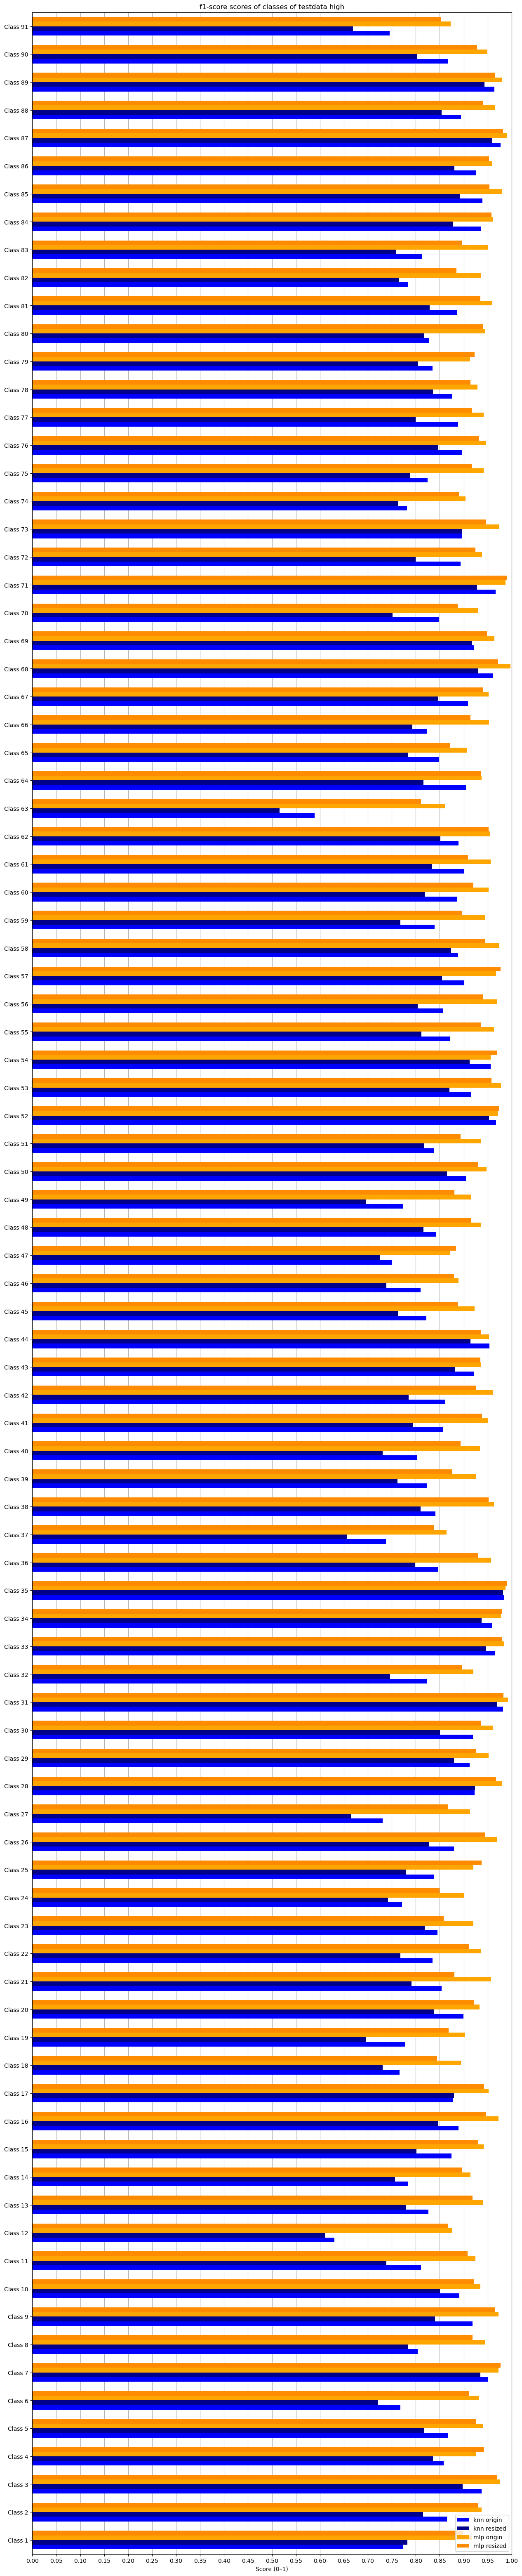

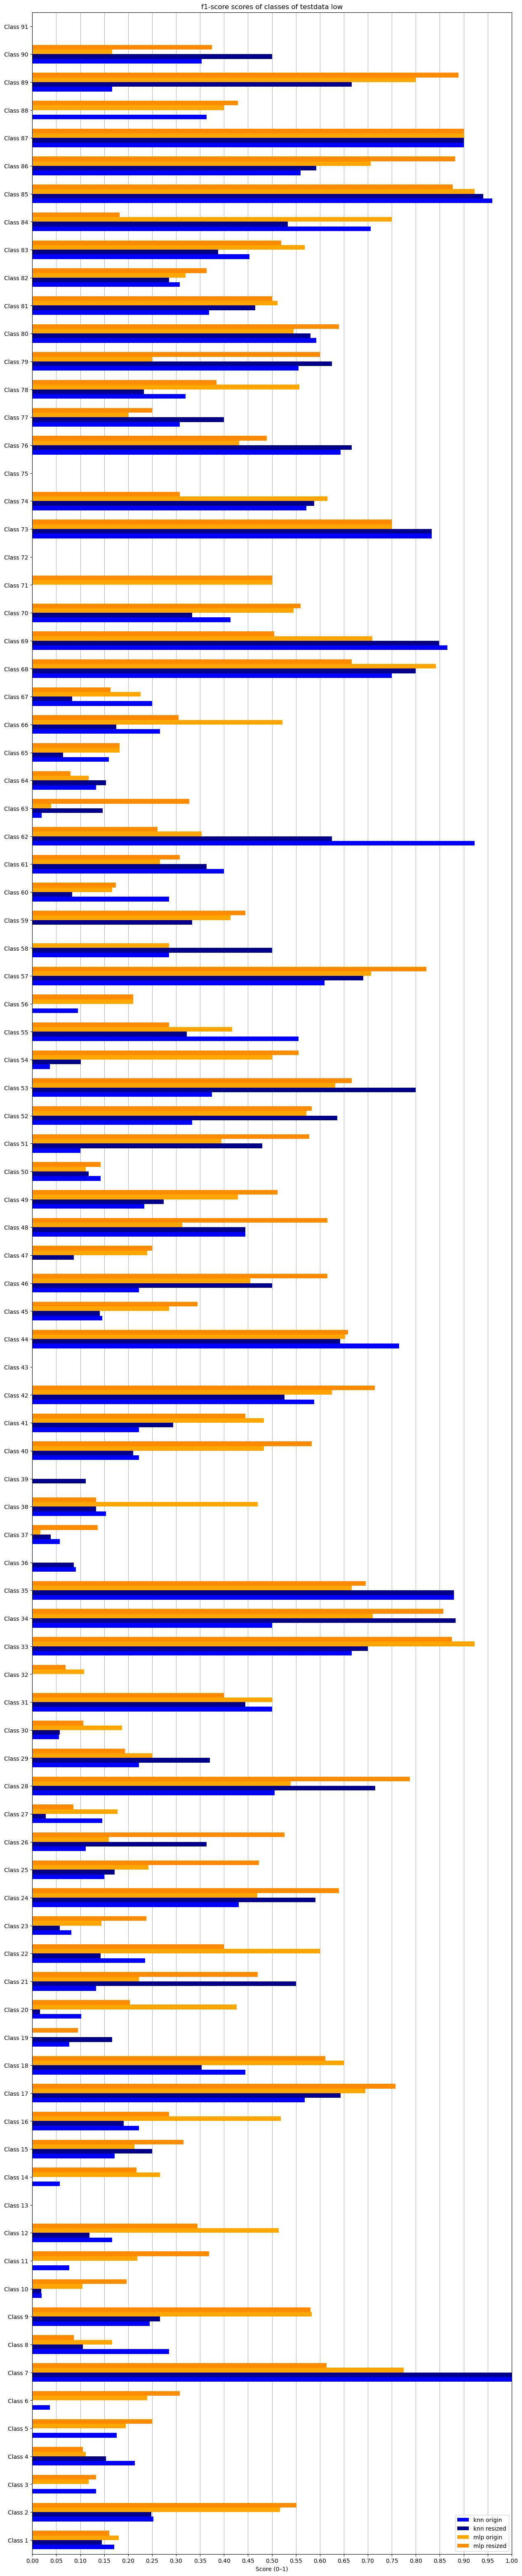

In [43]:
scores = ['precision', 'recall', 'f1-score']

for score in scores:
    # high
    high_testdata_class_scores_barchart = plot_bar_chart_of_class_scores(
        knn_origin_high_scores.loc[[score], map(str, range(91))].squeeze(),
        knn_resized_high_scores.loc[[score], map(str, range(91))].squeeze(),
        mlp_origin_high_scores.loc[[score], map(str, range(91))].squeeze(),
        mlp_resized_high_scores.loc[[score], map(str, range(91))].squeeze(),
        f'{score} scores of classes of testdata high'
    )

    high_testdata_class_scores_barchart.savefig( result_dir_path / f'on_class_level/high_testdata_class_scores_{score}_barchart.pdf')

    # low
    low_testdata_class_scores_barchart = plot_bar_chart_of_class_scores(
        knn_origin_low_scores.loc[[score], map(str, range(91))].squeeze(),
        knn_resized_low_scores.loc[[score], map(str, range(91))].squeeze(),
        mlp_origin_low_scores.loc[[score], map(str, range(91))].squeeze(),
        mlp_resized_low_scores.loc[[score], map(str, range(91))].squeeze(),
        f'{score} scores of classes of testdata low'
    )
    low_testdata_class_scores_barchart.savefig( result_dir_path / f'on_class_level/low_testdata_class_scores_{score}_barchart.pdf')